In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("chickweight.csv")

In [2]:
# df.head()

In [3]:
# df.describe()

In [4]:
# df.info()

In [5]:
# ax = sns.countplot(x="Diet", data=df)

In [6]:
# df.loc[df["Chick"] == 3]

In [7]:
# for index, row in df.loc[df["Chick"] == 3].iterrows():
# grouped_diet = df.groupby(df["Diet"])
# grouped_diet.describe().T

In [8]:
cols = list(df.columns.values)
df = df[[cols[2]] + [cols[3]] + cols[0:2]]
df.head()

,Chick,Diet,weight,Time
0,1,1,42,0
1,1,1,51,2
2,1,1,59,4
3,1,1,64,6
4,1,1,76,8


In [9]:
df["weight"] *= 10

In [10]:
# df.groupby(["Diet"]).mean().sort_values(["weight"], ascending=False)

In [11]:
# d_p = df.pivot_table(values="weight", index=['Chick', 'Diet'], columns='Time')

# d = d_p.stack().reset_index(name='weight')
# g = sns.FacetGrid(d, col="Diet", margin_titles=True)
# g.map(sns.regplot, "Time", "weight",fit_reg=False, x_jitter=.1)

In [12]:
# sns.catplot(x="Time", y="weight", col="Diet", data=d, kind="box", col_wrap=2)

Desweiteren wissen wir die Kosten je Diät Tag:

* Diät 1: 0.50
* Diät 2: 0.45
* Diät 3: 0.60
* Diät 4: 0.55

Bestimmen Sie die Kosten und dann den Gewinn pro Huhn. Ermitteln Sie anschließend, welche Diät Sie aufgrund vom Gewinn empfehlen würden.

In [13]:
df_cost = df.copy()
df_cost["cost"] = 1
df_cost

,Chick,Diet,weight,Time,cost
0,1,1,420,0,1
1,1,1,510,2,1
2,1,1,590,4,1
3,1,1,640,6,1
4,1,1,760,8,1
...,...,...,...,...,...
573,50,4,1750,14,1
574,50,4,2050,16,1
575,50,4,2340,18,1
576,50,4,2640,20,1


In [14]:
df_cost.loc[df_cost["Diet"] == 1, ["cost"]] = 0.5
df_cost.loc[df_cost["Diet"] == 2, ["cost"]] = 0.45
df_cost.loc[df_cost["Diet"] == 3, ["cost"]] = 0.6
df_cost.loc[df_cost["Diet"] == 4, ["cost"]] = 0.55
df_cost

,Chick,Diet,weight,Time,cost
0,1,1,420,0,0.50
1,1,1,510,2,0.50
2,1,1,590,4,0.50
3,1,1,640,6,0.50
4,1,1,760,8,0.50
...,...,...,...,...,...
573,50,4,1750,14,0.55
574,50,4,2050,16,0.55
575,50,4,2340,18,0.55
576,50,4,2640,20,0.55


Wir gehen nun von einem Preis von 9 EUR pro kg aus für Hühner mit einem Gewicht über 1.5 kg. Für die Hühner mit einem geringeren Gewicht kann nur ein Preis von 7 EUR erzielt werden. Ermitteln Sie den Preis pro Huhn:

In [15]:
df_cost["price"] = 1
df_cost.loc[df_cost["weight"] > 1500, ["price"]] = 9 * df_cost["weight"] / 1000
df_cost.loc[df_cost["weight"] <= 1500, ["price"]] = 7 * df_cost["weight"] / 1000

dff = df_cost.copy()
df_cost

,Chick,Diet,weight,Time,cost,price
0,1,1,420,0,0.50,2.94
1,1,1,510,2,0.50,3.57
2,1,1,590,4,0.50,4.13
3,1,1,640,6,0.50,4.48
4,1,1,760,8,0.50,5.32
...,...,...,...,...,...,...
573,50,4,1750,14,0.55,15.75
574,50,4,2050,16,0.55,18.45
575,50,4,2340,18,0.55,21.06
576,50,4,2640,20,0.55,23.76


In [16]:
# ddf = df_cost.copy()

In [17]:
# ddf = ddf.groupby(["Chick"]).max()
# ddf

In [18]:
# ddf["cost_2"] = ddf["Time"]*ddf["cost"]
# ddf

In [19]:
# ddf.loc[ddf["Time"] == 21, ["total"]] = ddf["price"]- ddf["cost_2"]
# ddf.loc[ddf["Time"] < 21, ["total"]] = - ddf["cost_2"]
# ddf

In [20]:
# ddf.groupby(["Diet"]).mean()

### Zusatz

Falls Sie noch Zeit haben, versuchen Sie sich weitere Fragestellungen zu überlegen.

Hier ein paar Anregungen:
 * War der Verkauf am 21. Tag immer der Idealste?
 * Wenn nein, gibt es einen optimaleren Verkaufstag pro Diät?
 * Ändert sich die Wahl, wenn man die Betrachtung über die Tiere, die vor dem Verkaufstag gestorben sind mit in Betracht zieht? (Kosten pro erlebten Tag)
 * ...

In [21]:
dff["cost"] *= dff["Time"] 
dff

,Chick,Diet,weight,Time,cost,price
0,1,1,420,0,0.00,2.94
1,1,1,510,2,1.00,3.57
2,1,1,590,4,2.00,4.13
3,1,1,640,6,3.00,4.48
4,1,1,760,8,4.00,5.32
...,...,...,...,...,...,...
573,50,4,1750,14,7.70,15.75
574,50,4,2050,16,8.80,18.45
575,50,4,2340,18,9.90,21.06
576,50,4,2640,20,11.00,23.76


In [22]:
dead_chicks = []
dead_chicks.append([8, 1, 0, 21, 0, 0])
for i in range(4):
    if i < 3:
        dead_chicks.append([15,1,0,16+2*i,0,0])
    else:
        dead_chicks.append([15,1,0,21,0,0])
for i in range(5):
    if i < 4:
        dead_chicks.append([16, 1, 0, 14+2*i,0,0])
    else:
        dead_chicks.append([16,1,0,21,0,0])
for i in range(9):
    if i < 8:
        dead_chicks.append([18, 1, 0, 4+2*i,0,0])
    else:
        dead_chicks.append([18,1,0,21,0,0])
dead_chicks.append([44, 4, 0, 20, 0, 0])
dead_chicks.append([44, 4, 0, 21, 0, 0])

# dead_chicks

for i, chick in enumerate(dead_chicks):
    dff.loc[578+i] = chick

dff


,Chick,Diet,weight,Time,cost,price
0,1,1,420,0,0.0,2.94
1,1,1,510,2,1.0,3.57
2,1,1,590,4,2.0,4.13
3,1,1,640,6,3.0,4.48
4,1,1,760,8,4.0,5.32
...,...,...,...,...,...,...
594,18,1,0,16,0.0,0.00
595,18,1,0,18,0.0,0.00
596,18,1,0,21,0.0,0.00
597,44,4,0,20,0.0,0.00


In [23]:
dff.loc[(dff["Diet"] == 1)&(dff["weight"] != 0), ["cost"]] = 0.5 *dff["Time"]
dff.loc[(dff["Diet"] == 2)&(dff["weight"] != 0), ["cost"]] = 0.45 *dff["Time"]
dff.loc[(dff["Diet"] == 3)&(dff["weight"] != 0), ["cost"]] = 0.6 *dff["Time"]
dff.loc[(dff["Diet"] == 4)&(dff["weight"] != 0), ["cost"]] = 0.55 *dff["Time"]

dff.loc[(dff["Chick"] == 8)&(dff["weight"] == 0), ["cost"]] = 10
dff.loc[(dff["Chick"] == 15)&(dff["weight"] == 0), ["cost"]] = 7
dff.loc[(dff["Chick"] == 16)&(dff["weight"] == 0), ["cost"]] = 6
dff.loc[(dff["Chick"] == 18)&(dff["weight"] == 0), ["cost"]] = 1
dff.loc[(dff["Chick"] == 44)&(dff["weight"] == 0), ["cost"]] = 18*0.55

dff.loc[dff["Chick"] == 8]

,Chick,Diet,weight,Time,cost,price
84,8,1,420,0,0.0,2.94
85,8,1,500,2,1.0,3.50
86,8,1,610,4,2.0,4.27
87,8,1,710,6,3.0,4.97
88,8,1,840,8,4.0,5.88
89,8,1,930,10,5.0,6.51
90,8,1,1100,12,6.0,7.70
91,8,1,1160,14,7.0,8.12
92,8,1,1260,16,8.0,8.82
93,8,1,1340,18,9.0,9.38


In [24]:
dff["total"] = dff["price"]- dff["cost"]
dff

,Chick,Diet,weight,Time,cost,price,total
0,1,1,420,0,0.0,2.94,2.94
1,1,1,510,2,1.0,3.57,2.57
2,1,1,590,4,2.0,4.13,2.13
3,1,1,640,6,3.0,4.48,1.48
4,1,1,760,8,4.0,5.32,1.32
...,...,...,...,...,...,...,...
594,18,1,0,16,1.0,0.00,-1.00
595,18,1,0,18,1.0,0.00,-1.00
596,18,1,0,21,1.0,0.00,-1.00
597,44,4,0,20,9.9,0.00,-9.90


In [25]:
dff = dff.sort_values(["Chick", "Time"])
dff

,Chick,Diet,weight,Time,cost,price,total
0,1,1,420,0,0.00,2.94,2.94
1,1,1,510,2,1.00,3.57,2.57
2,1,1,590,4,2.00,4.13,2.13
3,1,1,640,6,3.00,4.48,1.48
4,1,1,760,8,4.00,5.32,1.32
...,...,...,...,...,...,...,...
573,50,4,1750,14,7.70,15.75,8.05
574,50,4,2050,16,8.80,18.45,9.65
575,50,4,2340,18,9.90,21.06,11.16
576,50,4,2640,20,11.00,23.76,12.76


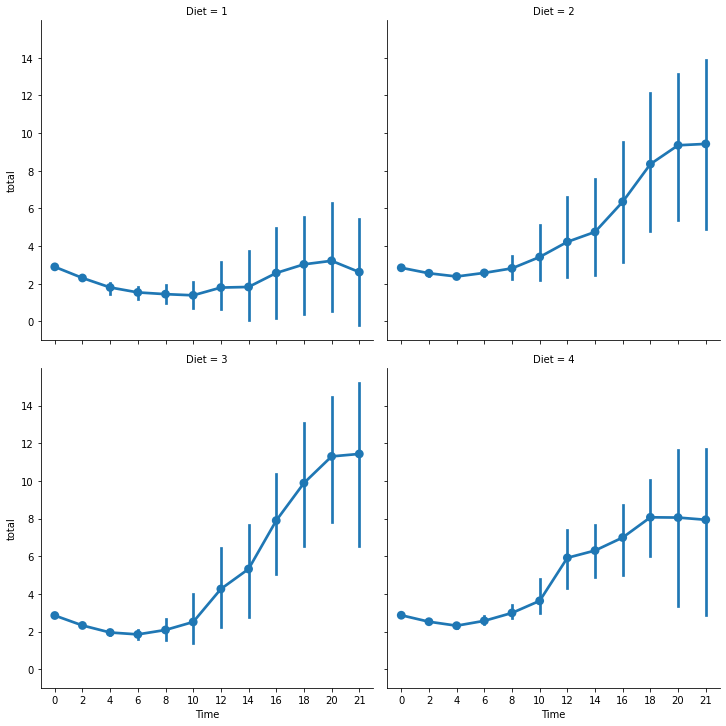

In [46]:
sns.catplot(x="Time", y="total", col="Diet", data=dff, kind="point", col_wrap=2)

In [35]:
dff["ratio"] = dff["price"]/dff["cost"]
dff.head(50)

,Chick,Diet,weight,Time,cost,price,total,ratio
0,1,1,420,0,0.0,2.94,2.94,inf
1,1,1,510,2,1.0,3.57,2.57,3.570000
2,1,1,590,4,2.0,4.13,2.13,2.065000
3,1,1,640,6,3.0,4.48,1.48,1.493333
4,1,1,760,8,4.0,5.32,1.32,1.330000
5,1,1,930,10,5.0,6.51,1.51,1.302000
6,1,1,1060,12,6.0,7.42,1.42,1.236667
7,1,1,1250,14,7.0,8.75,1.75,1.250000
8,1,1,1490,16,8.0,10.43,2.43,1.303750
9,1,1,1710,18,9.0,15.39,6.39,1.710000


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


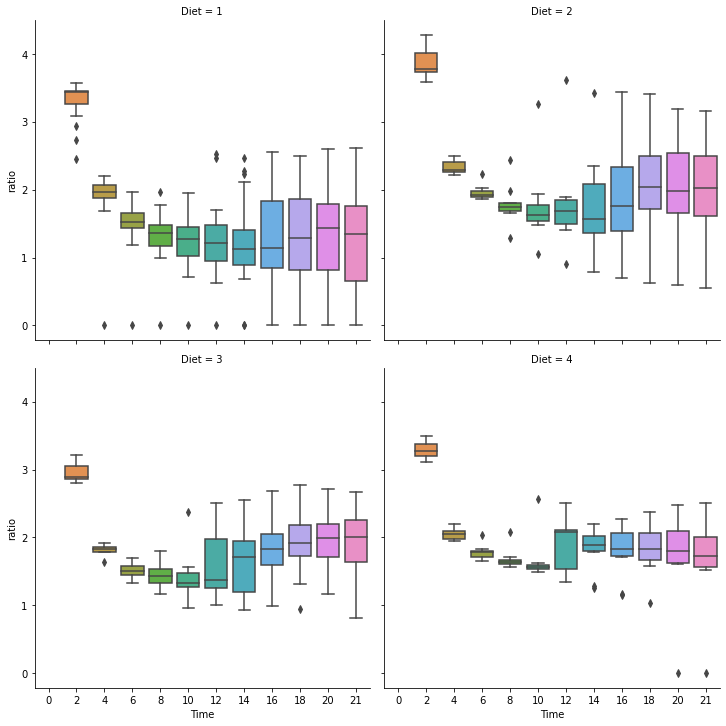

In [36]:
sns.catplot(x="Time", y="ratio", col="Diet", data=dff, kind="box", col_wrap=2)